Assignment 4
In this assignment you will create a least squares regression model for the PetalLength and PetalWidth columns of the iris dataset. Using this model, you will then generate a plot that shows both the petal data and the prediction line. 

You are to implement your own least squares function. You are forbidden to use an existing method from libraries such as numpy.linalg, statsmodels, or scikit-learn.

Upload your solution to github and submit the URL. Please make sure that any descriptive text you include is in a cell formatted as "Markdown". Your python code should be in cells formatted as "Code". You can change this using the drop down box in Jupyter, or by selecting a cell and hitting "M" for markdown, or "Y" for code. For an example of what a properly formatted notebook should look like, refer at the notebook files for the assigned readings. 

Step 1
Import the necessary modules (numpy, pandas, matplotlib.pyplot) and set jupyter to generate plots inline.

In [1]:
#Imports data
import pandas as pd
from numpy.linalg import inv
import numpy as np
import matplotlib.pyplot as plt
#Prints Output to Notebook
%matplotlib inline

Step 2
Read in the iris data set and examine the head to make sure the data is in a usable format

In [2]:
#Reads in file
df = pd.read_csv('iris.txt')
#Prints out the header 
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Step 3
Create a new (and reduced) data set consisting of only the PetalLength and PetalWidth columns (1 point)

In [3]:
df['X'] = 1
reducedData = df[['X','PetalLength','PetalWidth']]

Step 4
Create a scatter plot of the reduced data set to make sure the data does not have any outliers or anomalies

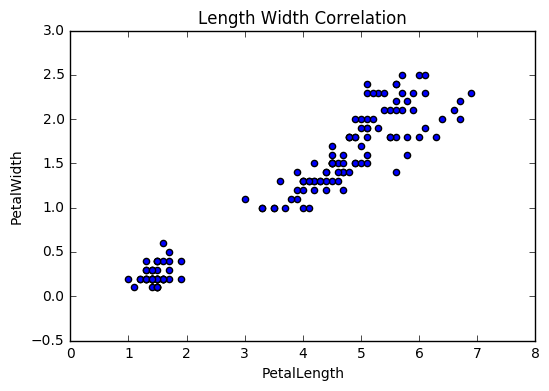

In [4]:
reducedData.plot.scatter(x='PetalLength', y='PetalWidth', title='Length Width Correlation');

Step 5.1
Create a function to calculate the coefficients of a least squares approximation 

In [5]:
#Takes a dataset one independant variable and one dependar variable. This returns an array with two values the first one is the
#y intercept the second one is the coffient for the independant varaible
def calcCofficients(dataframe, independantVar, dependarVar):
    df2 = dataframe[['X', independantVar]]
    betaX = np.dot(np.dot(inv(np.dot(df2.T.as_matrix(),df2.as_matrix())), df2.T.as_matrix()),dataframe[dependarVar])
    return betaX


Step 5.2
Create a function to use the least squares coefficients to predict the value of a given input point 

In [6]:
#Once we have beta value we can predict the values of the dependant varabile 
def predictValues(dataFrame, independantVar, betaValues):
    predictedNumbers = betaValues[0]+  dataFrame[independantVar] * betaValues[1] 
    return predictedNumbers

Step 6
Using your regression model, calculate the points along the regression line of the reduced data set 

In [7]:
#Calls two functions to get the predicited dependant values 
betas = calcCofficients(reducedData, 'PetalLength', 'PetalWidth')
predDependantValues = predictValues(reducedData, 'PetalLength', betas)

Step 7
Plot the regression line on top of a scatter plot of the reduced data set

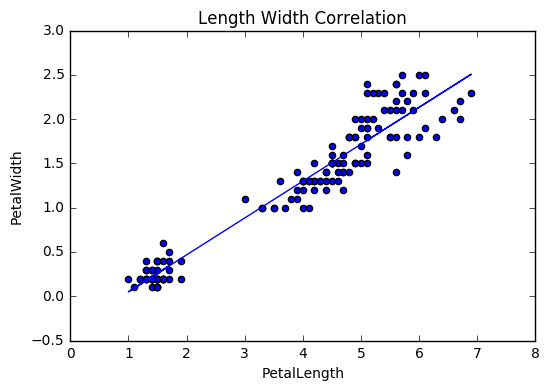

In [8]:
#plots the actual values and the predicitions
plt.scatter(reducedData['PetalLength'], reducedData['PetalWidth'])
plt.plot(reducedData['PetalLength'], predDependantValues)
plt.title('Length Width Correlation')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')